In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics # for calculating the auc from fpr, tpr
from matplotlib.backends.backend_pdf import PdfPages

plt.style.use("science.mplstyle")


In [2]:
base_dir = "/global/home/users/rrmastandrea/MJetCLR/"  # change this to your working directory

First get the best AUC data

dim_128_seed_1
0p05kS_50kB_dim_128_seed_1
0p1kS_50kB_dim_128_seed_1
0p5kS_50kB_dim_128_seed_1
01kS_50kB_dim_128_seed_1
05kS_50kB_dim_128_seed_1
10kS_50kB_dim_128_seed_1
25kS_50kB_dim_128_seed_1
50kS_50kB_dim_128_seed_1


/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computin

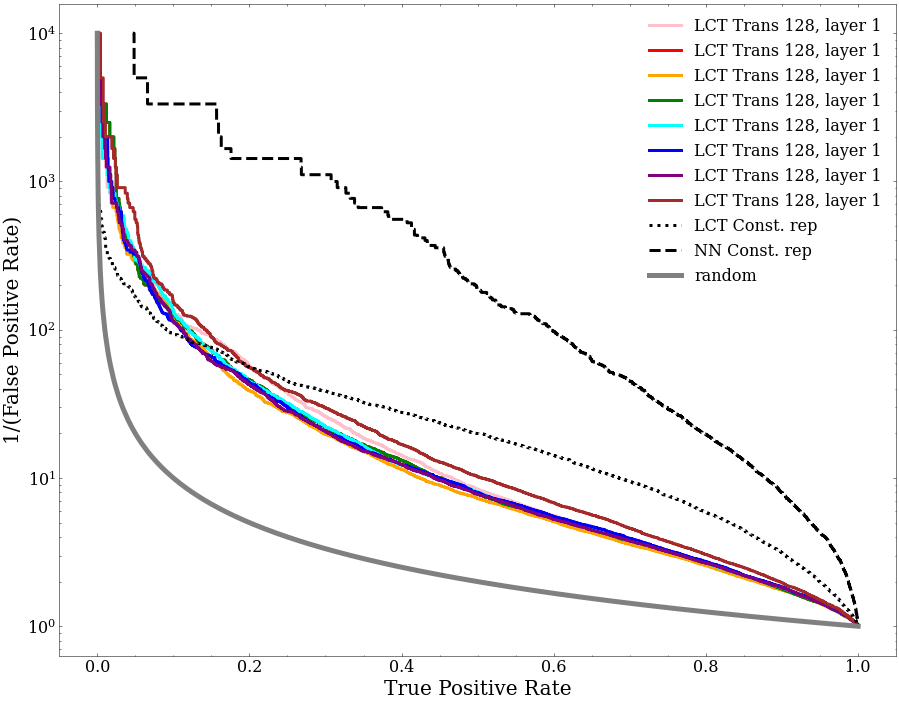

In [4]:
# Load in the data

constit_num = 50


dim = 128
seeds_list = [1]

exp_id_S_nums = [50, 100, 500, 1000, 5000, 10000, 25000, 50000]
exp_id_codes = ["0p05", "0p1", "0p5", "01","05", "10","25", "50"] 


lct_const_rep_tpr_dict = {}
lct_const_rep_fpr_dict = {}
nn_const_rep_tpr_dict = {}
nn_const_rep_fpr_dict = {}
trans_BC_tpr_dict = {}
trans_BC_fpr_dict = {}
lct_tpr_dict = {0:{},1:{},2:{}}
lct_fpr_dict = {0:{},1:{},2:{}}
nn_tpr_dict = {0:{},1:{},2:{}}
nn_fpr_dict = {0:{},1:{},2:{}}

lct_best_auc_dict = {0:{x:0 for x in exp_id_codes},1:{x:0 for x in exp_id_codes},2:{x:0 for x in exp_id_codes}}
nn_best_auc_dict = {0:{x:0 for x in exp_id_codes},1:{x:0 for x in exp_id_codes},2:{x:0 for x in exp_id_codes}}
trans_BC_best_auc_dict = {dim:0}
lct_const_rep_best_auc_dict = {dim:0}
nn_const_rep_best_auc_dict = {dim:0}

                    
for seed in seeds_list:

    exp_id_t = "dim_"+str(dim)+"_seed_"+str(seed)

    print(exp_id_t)

    expt_dir_trans_BC =  base_dir + "projects/rep_learning/experiments/dim_scan_22_02_19/" + exp_id_t + "/"
    expt_dir_CR =  base_dir + "projects/rep_learning/experiments/dim_scan_22_02_19/const_rep_seed_"+str(seed)+"/"

    # Constituent reps
    #"""

    local_tpr = np.load( expt_dir_CR+"const_rep_lct_tpr_"+str(2*constit_num)+".npy" )
    local_fpr = np.load( expt_dir_CR+"const_rep_lct_fpr_"+str(2*constit_num)+".npy" )
    local_auc = metrics.auc(local_fpr, local_tpr)

    if local_auc >= lct_const_rep_best_auc_dict[dim]:
        lct_const_rep_best_auc_dict[dim] = local_auc
        lct_const_rep_tpr_dict[dim] = local_tpr
        lct_const_rep_fpr_dict[dim] = local_fpr

    local_tpr = np.load( expt_dir_CR+"const_rep_nn_tpr_"+str(2*constit_num)+".npy" )
    local_fpr = np.load( expt_dir_CR+"const_rep_nn_fpr_"+str(2*constit_num)+".npy" )
    local_auc = metrics.auc(local_fpr, local_tpr)

    if local_auc >= nn_const_rep_best_auc_dict[dim]:
        nn_const_rep_best_auc_dict[dim] = local_auc
        nn_const_rep_tpr_dict[dim] = local_tpr
        nn_const_rep_fpr_dict[dim] = local_fpr

    #"""

    # Transformer BC 
    #"""
    local_tpr = np.load( expt_dir_trans_BC+"trans_BC_tpr_"+str(constit_num)+".npy" )
    local_fpr = np.load( expt_dir_trans_BC+"trans_BC_fpr_"+str(constit_num)+".npy" )
    local_auc = metrics.auc(local_fpr, local_tpr)


    if local_auc >= trans_BC_best_auc_dict[dim]:

        trans_BC_best_auc_dict[dim] = local_auc
        trans_BC_tpr_dict[dim] = local_tpr
        trans_BC_fpr_dict[dim] = local_fpr
    #"""



for code in exp_id_codes:
                    
    for seed in seeds_list:

        exp_id = code+"kS_50kB_"+"dim_"+str(dim)+"_seed_"+str(seed)
        exp_id_t = "dim_"+str(dim)+"_seed_"+str(seed)

        print(exp_id)

        expt_dir = base_dir + "projects/rep_learning/experiments/SB_ratios_22_03_16/" + exp_id + "/"

        #"""
        # CLR trained LCT
        for i in range(3):
            local_tpr = np.load( expt_dir+"CLR_LCT"+str(i)+"_tpr_"+str(constit_num)+".npy" )
            local_fpr = np.load( expt_dir+"CLR_LCT"+str(i)+"_fpr_"+str(constit_num)+".npy" )
            local_auc = metrics.auc(local_fpr, local_tpr)

            if local_auc >= lct_best_auc_dict[i][code]:
                lct_best_auc_dict[i][code] = local_auc
                lct_tpr_dict[i][code] = local_tpr
                lct_fpr_dict[i][code] = local_fpr


        # CLR trained NN
        for i in range(3):
            local_tpr = np.load( expt_dir+"CLR_NN"+str(i)+"_tpr_"+str(constit_num)+".npy" )
            local_fpr = np.load( expt_dir+"CLR_NN"+str(i)+"_fpr_"+str(constit_num)+".npy" )
            local_auc = metrics.auc(local_fpr, local_tpr)

            if local_auc >= nn_best_auc_dict[i][code]:
                nn_best_auc_dict[i][code] = local_auc
                nn_tpr_dict[i][code] = local_tpr
                nn_fpr_dict[i][code] = local_fpr


colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (15,12))

l = 3

layer = 1


for i, code in enumerate(exp_id_codes):


    # ALL DIMS
    #"""
    plt.plot(lct_tpr_dict[layer][code], 1.0/lct_fpr_dict[layer][code], label = "LCT Trans "+str(dim)+", layer "+str(layer), color = colors[i], linestyle = "solid",  linewidth = l)
    #plt.plot(nn_tpr_dict[layer][code], 1.0/nn_fpr_dict[layer][code], label = "NN Trans "+str(dim)+", layer "+str(layer), color = colors[i], linestyle = (0,(8,10)),  linewidth = l)
    #plt.plot(trans_BC_tpr_dict[code], 1.0/trans_BC_fpr_dict[code], label = "Trans BC "+str(dim), color = colors[i], linestyle = "dashdot",  linewidth = l)
    #"""



plt.plot(lct_const_rep_tpr_dict[dim], 1.0/lct_const_rep_fpr_dict[dim], label = "LCT Const. rep", color = "black", linestyle = "dotted",  linewidth = l)
plt.plot(nn_const_rep_tpr_dict[dim], 1.0/nn_const_rep_fpr_dict[dim], label = "NN Const. rep", color = "black", linestyle = "dashed" , linewidth = l)

plt.plot(lct_const_rep_tpr_dict[dim],1.0/lct_const_rep_tpr_dict[dim], label = "random", color = "grey", linewidth = 5)

plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()



img_name = "fpr.pdf"
pp = PdfPages(img_name)
pp.savefig(fig)
pp.close()





In [ ]:
# Load in the data

dim = 0
seeds_list = [1]

exp_id_S_nums = [50, 100, 500, 1000, 5000, 10000, 25000, 50000]
exp_id_codes = ["0p05", "0p1", "0p5", "01","05", "10","25", "50"] 


exp_id_SB_ratios = [float(x)/float(x+50000) for x in exp_id_S_nums]



lct_auc_dict = {0:[],1:[],2:[]}
nn_auc_dict = {0:[],1:[],2:[]}
lct_maxsic_dict = {0:[],1:[],2:[]}
nn_maxsic_dict = {0:[],1:[],2:[]}
trans_BC_auc = []
trans_BC_maxsic = []

fixed_TPR = 0.5

lct_FPRatTPR_dict = {0:[],1:[],2:[]}
nn_FPRatTPR_dict = {0:[],1:[],2:[]}
trans_BC_FPRatTPR = []



for code in exp_id_codes:
    
    exp_id = code
    
   
    # Transformer BC 
    
    trans_BC_auc.append(metrics.auc(trans_BC_fpr_dict[exp_id], trans_BC_tpr_dict[exp_id]))

    SIC = trans_BC_tpr_dict[exp_id]/np.sqrt(trans_BC_fpr_dict[exp_id])
    finite_SIC = SIC[np.isfinite(SIC)]
    trans_BC_maxsic.append(np.max(finite_SIC))

    dist_from_fixed_tpr = np.abs(trans_BC_tpr_dict[exp_id] - fixed_TPR)
    min_dist_ind = np.where(dist_from_fixed_tpr == np.min(dist_from_fixed_tpr))[0][0]
    trans_BC_FPRatTPR.append(trans_BC_fpr_dict[exp_id][min_dist_ind])
    
    
    for i in range(3):
    
        # CLR trained LCT
        
        lct_auc_dict[i].append(metrics.auc(lct_fpr_dict[i][exp_id], lct_tpr_dict[i][exp_id]))

        SIC = lct_tpr_dict[i][exp_id]/np.sqrt(lct_fpr_dict[i][exp_id])
        finite_SIC = SIC[np.isfinite(SIC)]
        lct_maxsic_dict[i].append(np.max(finite_SIC))

        dist_from_fixed_tpr = np.abs(lct_tpr_dict[i][exp_id] - fixed_TPR)
        min_dist_ind = np.where(dist_from_fixed_tpr == np.min(dist_from_fixed_tpr))[0][0]
        lct_FPRatTPR_dict[i].append(lct_fpr_dict[i][exp_id][min_dist_ind])

    
        # CLR trained NN
        nn_auc_dict[i].append(metrics.auc(nn_fpr_dict[i][exp_id], nn_tpr_dict[i][exp_id]))

        SIC = nn_tpr_dict[i][exp_id]/np.sqrt(nn_fpr_dict[i][exp_id])
        finite_SIC = SIC[np.isfinite(SIC)]
        nn_maxsic_dict[i].append(np.max(finite_SIC))
        
        dist_from_fixed_tpr = np.abs(nn_tpr_dict[i][exp_id] - fixed_TPR)
        min_dist_ind = np.where(dist_from_fixed_tpr == np.min(dist_from_fixed_tpr))[0][0]
        nn_FPRatTPR_dict[i].append(nn_fpr_dict[i][exp_id][min_dist_ind])
    
    
    
    
    

# Individual Plots

## TPR / FPR

In [ ]:
fig = plt.figure(figsize = (20,16))

exp_id_codes = ["0p05", "0p1", "0p5", "01","05", "10","25", "50"] 

colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]

l = 3

for i, exp_id in enumerate(exp_id_codes): 

    # ALL DIMS
    #"""
    # random
    plt.plot(lct_tpr_dict[2][exp_id],1.0/lct_tpr_dict[2][exp_id], color = "black", linewidth = 5)

    #plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT Const. rep "+exp_id, color = colors[i], linestyle = "dotted",  linewidth = l)
    #plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN Const. rep "+exp_id, color = colors[i], linestyle = "dashed" , linewidth = l)
    plt.plot(lct_tpr_dict[2][exp_id], 1.0/lct_fpr_dict[2][exp_id], label = "LCT Trans final "+exp_id, color = colors[i], linestyle = "solid",  linewidth = l)
    plt.plot(nn_tpr_dict[2][exp_id], 1.0/nn_fpr_dict[2][exp_id], label = "NN Trans final "+exp_id, color = colors[i], linestyle = (0,(8,10)),  linewidth = l)
    #"""
    
    # ONE DIM
    """
    plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT Const. rep "+exp_id, color = colors[0], linestyle = "dotted",  linewidth = l)
    plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN Const. rep "+exp_id, color = colors[1], linestyle = "dashed" , linewidth = l)
    plt.plot(lct_tpr_dict[2][exp_id], 1.0/lct_fpr_dict[2][exp_id], label = "LCT Trans final "+exp_id, color = colors[2], linestyle = "solid",  linewidth = l)
    plt.plot(nn_tpr_dict[2][exp_id], 1.0/nn_fpr_dict[2][exp_id], label = "NN Trans final "+exp_id, color = colors[3], linestyle = (0,(8,10)),  linewidth = l)
    plt.plot(trans_BC_tpr_dict[exp_id], 1.0/trans_BC_fpr_dict[exp_id], label = "Trans BC "+exp_id, color = colors[4], linestyle = "dashdot",  linewidth = l)
    """
plt.plot(trans_BC_tpr_dict[exp_id], 1.0/trans_BC_fpr_dict[exp_id], label = "Trans BC", color = colors[i], linestyle = "dashdot",  linewidth = l)

    
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()


#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
##pp.savefig(fig)
#pp.close()




## SIC

In [ ]:
fig = plt.figure(figsize = (20,16))

exp_id_codes = ["0p05", "0p1", "0p5", "01","05", "10","25", "50"] 
colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]

l = 3

with np.errstate(divide='ignore'):

    for i, exp_id in enumerate(exp_id_codes): 

        # ALL DIMS
        #"""
        # random
        
        #plt.plot(nn_tpr_dict[1][exp_id], nn_tpr_dict[1][exp_id]/np.sqrt(nn_fpr_dict[1][exp_id]), label = "LCT Trans final "+exp_id, color = colors[i], linestyle = "solid",  linewidth = l)
        plt.plot(nn_tpr_dict[2][exp_id], nn_tpr_dict[2][exp_id]/np.sqrt(nn_fpr_dict[2][exp_id]), label = "NN Trans final "+exp_id, color = colors[i], linestyle = (0,(8,10)),  linewidth = l)
        plt.plot(lct_tpr_dict[2][exp_id], lct_tpr_dict[2][exp_id]/np.sqrt(lct_fpr_dict[2][exp_id]), label = "LCT Trans final "+exp_id, color = colors[i], linestyle = "solid",  linewidth = l)
    plt.plot(trans_BC_tpr_dict[exp_id], trans_BC_tpr_dict[exp_id]/np.sqrt(trans_BC_fpr_dict[exp_id]), label = "Trans BC final", color = colors[i], linestyle = "dashdot",  linewidth = l)

        #"""

 
    
#plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()


#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
##pp.savefig(fig)
#pp.close()



# Summary plots

## Final AUC

In [ ]:
# Load in the data
exp_id_S_nums = [50, 100, 500, 1000, 5000, 10000, 25000, 50000]
exp_id_codes = ["0p05", "0p1", "0p5", "01","05", "10","25", "50"] 

exp_id_SB_ratios = [float(x)/float(x+50000) for x in exp_id_S_nums]


colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (10,8))

l = 3

plt.plot(exp_id_SB_ratios, lct_auc_dict[0], label = "LCT transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_auc_dict[1], label = "LCT hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_auc_dict[2], label = "LCT output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_auc_dict[0], label = "NN transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_auc_dict[1], label = "NN hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_auc_dict[2], label = "NN output layer", color = "green", linewidth = l)

#plt.plot(exp_id_SB_ratios, trans_BC_auc, label = "TransBC", color = "red", linewidth = l)

    
plt.xscale("symlog", linthresh=.05)
plt.xlabel("S/B ratio")
plt.ylabel("AUC")
plt.legend()
plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()



## max SIC

In [ ]:
# Load in the data

exp_id_S_nums = [50, 100, 500, 1000, 5000, 10000, 25000, 50000]
exp_id_codes = ["0p05", "0p1", "0p5", "01","05", "10","25", "50"] 

exp_id_SB_ratios = [float(x)/float(x+50000) for x in exp_id_S_nums]


colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (10,8))

l = 3

plt.plot(exp_id_SB_ratios, lct_maxsic_dict[0], label = "LCT transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[1], label = "LCT hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[2], label = "LCT output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_maxsic_dict[0], label = "NN transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[1], label = "NN hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[2], label = "NN output layer", color = "green", linewidth = l)

plt.plot(exp_id_SB_ratios, trans_BC_maxsic, label = "TransBC", color = "red", linewidth = l)

    
plt.xscale("symlog", linthresh=.05)
plt.xlabel("S/B ratio")
plt.ylabel("max(SIC)")
plt.legend()
plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()



## FPR at SPR

In [ ]:
# Load in the data
exp_id_S_nums = [50, 100, 500, 1000, 5000, 10000, 25000, 50000]
exp_id_codes = ["0p05", "0p1", "0p5", "01","05", "10","25", "50"] 

exp_id_SB_ratios = [float(x)/float(x+50000) for x in exp_id_S_nums]


colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (10,8))

l = 3

plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[0], label = "LCT transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[1], label = "LCT hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[2], label = "LCT output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[0], label = "NN transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[1], label = "NN hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[2], label = "NN output layer", color = "green", linewidth = l)

#plt.plot(exp_id_SB_ratios, trans_BC_FPRatTPR, label = "TransBC", color = "red", linewidth = l)

    
plt.xscale("symlog", linthresh=.05)
plt.xlabel("S/B ratio")
plt.ylabel("FPR @ TPR = 0.5")
plt.legend()
plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()

